In [2]:
'''
I. 정확도(Accuracy)
    - 정확도 = 맞은 데이터 수/ 전체 데이터 수
    - 타이타닉 예제의 경우 단순히 남자면 죽음, 여자면 생존이라고 예측해도 70% 이상의 정확성 발휘 -> 이진분류의 경우 정확도가 왜곡된 정보를 줄 확률이 높음
'''
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator): #sklearn의 BaseEstimator를 상속받으면 estimator를 개발자가 직접 생성 가능
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred
    
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [4]:
'''
    - 정확도는 불균형 레이블의 경우도 적합한 지표가 될 수 없음(단순히 많은 데이터를 예측하면 되므로)
    
II. 오차행렬
    - 오차행렬을 통해 나온 값을 TN, FP, FN, TP로 구분 : 첫번째 값은 맞았는지(T)/틀렸는지(F) , 두번째 값은 부정값인지(N), 긍정값인지(P)
        ex) 0을 0으로(N) 예측해서 맞은(T) 경우 -> TN
'''
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, mypredictions)

array([[92, 18],
       [20, 49]], dtype=int64)

In [5]:
'''
    - 정확도 = (TN + TP) / 전체

III. 정밀도와 재현율
    - 정밀도 = TP / (FP + TP) ; positive로 예상한 것 중에서 맞은 비율
    - 재현율(=민감도 = TPR) = TP / (FN + TP) ; 실제값이 positive인 것중에서 맞은 비율
    - 재현율이 중요한 경우는 Positive를 Negative로 잘못 판단하면 안되는 경우(암 진단, 사기)
    - 정밀도기 중요한 경우는 Negative를 Positive로 잘못 판단하면 안되는 경우(스팸메일 분류)
    - 정밀도는 precision_score(), 재현율은 recall_score()로 구현
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 구하는 함수 만들기
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

#로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 평가 수행
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\1\anaconda3\envs\virtualtensor3.7\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
'''
    1. 정밀도/ 재현율 트레이드오프
        - 정밀도와 재현율 중 한쪽을 임곗값 조정 등을 통해 강제로 높이면 다른 한쪽이 떨어지는 현상
        - 사이킷런은 학습이 완료된 객체에서 predict_proba()를 호출해 개별 데이터의 레이블별 예측확률 제공 
'''
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis= 1)
print(result[:10])

[[0.46173353 0.53826647 1.        ]
 [0.87868533 0.12131467 0.        ]
 [0.87720609 0.12279391 0.        ]
 [0.88271185 0.11728815 0.        ]
 [0.85520662 0.14479338 0.        ]
 [0.88230053 0.11769947 0.        ]
 [0.88843165 0.11156835 0.        ]
 [0.20882849 0.79117151 1.        ]
 [0.78281728 0.21718272 0.        ]
 [0.36957401 0.63042599 1.        ]]


In [9]:
'''
        - 이진분류의 경우 임곗값 0.5를 기준으로 분류가 되는데 이 임곗값을 조정함으로써 재현율과 정밀도를 조정 가능 
'''
from sklearn.preprocessing import Binarizer

#임계값
custom_threshold = 0.5

#predict_proba() 반환값으 두번째 칼럼(positive)만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1) # 임계값이 custom_threshold를 기준으로 변경
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [10]:
#임계값을 낮추면
custom_threshold = 0.4

#predict_proba() 반환값으 두번째 칼럼(positive)만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1) # 임계값이 custom_threshold를 기준으로 변경
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict) # 재현율은 높아지는 반면 정밀도는 낮아짐 (TP 증가, FN감소, FP증가)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


In [12]:
'''
        - 사이킷런은 임계값 변화에 따른 평가 지표값의 변화를 파악하도록 precision_recall_curve() API 제공
        - 일반적으로 0.11 ~ 0.95 사이로 임계값이 변할 동안 평가지표의 변화를 반환
'''
from sklearn.metrics import precision_recall_curve

#레이블 값이 1 일때 예측확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제 데이터 세트와 레이블 값이 1일 때의 예측확률을 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape) #임계값의 shape 반환 -> 143

# 임계값 샘플 추출
thr_index = np.arange(0, thresholds.shape[0], 15)

#임계값에 따른 정밀도와 재현율
print('정밀도 :', np.round(precisions[thr_index],3))
print('재현율 :', np.round(recalls[thr_index],3))



(143,)
정밀도 : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
재현율 : [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


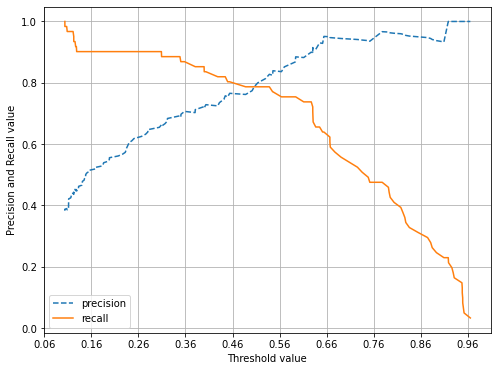

In [17]:
#시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [19]:
'''
    2. 정밀도와 재현율의 맹점
        - 조작가능성
    
IV. F1 스코어
    - 정밀도와 재현율을 결합 : F1 = 2 / (1/recall) + (1/precision)
'''
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f1)

0.7804878048780488


In [20]:
'''
V. ROC 곡선과 AUC
    - ROC 곡선(수신자 판단 곡선)은 이진 분류 모델의 예측 성능을 판단하는 중요 지표, FPR(False Positive rate)가 변할 때 TPR(=재현율)이 어떻게 변하는 지를 나타냄
    - FPR = FP/ (FP+ TN) = 1 - TNR ; TNR = TN/ (FP + TN)
'''
from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 예측확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, threshold = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, threshold.shape[0], 5)
print('FPR :', np.round(fprs[thr_index],3))
print('TPR :', np.round(tprs[thr_index],3))

FPR : [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
TPR : [0.033 0.639 0.705 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


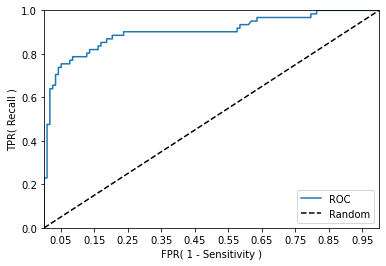

In [21]:
#이를 곡선으로 만들어보면
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] ) # 곡선이 45도 선에서 멀어질 수록 좋은 것 -> 이 둘 사이의 면적을 이용해 구한 것이 AUC

In [22]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score)) #1에 가까울 수록 좋음

ROC AUC 값: 0.9023


In [35]:
#모든 평가 지표를 보여주는 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [26]:
'''
VI. 피마 인디언 당뇨병 예측
    - https://www.kaggle.com/uciml/pima-indians-diabetes-database
    - 피처
        pregnancies : 임신횟수
        Glucose : 포도당 부하 검사 수치
        BloodPressure : 혈압
        SkinThickness : 피하지방
        Insulin : 혈청 인슐린
        BMI
        DiabetesPedigreeFunction : 당뇨 내력
        Age
        Outcome : 0 또는 1
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [27]:
diabetes_data.info() #널값 없음 + 모두 숫자형으로 별도의 인코딩 필요없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
#데이터 분리
X = pd.DataFrame()
Y = pd.DataFrame()

X = diabetes_data.iloc[:, :-1] #outcome을 제외한 데이터
Y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 156, stratify = Y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC:0.7919


C:\Users\1\anaconda3\envs\virtualtensor3.7\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


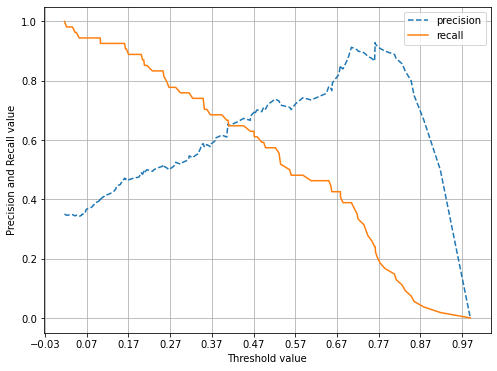

In [38]:
#임계값 별 재현율과 정밀도 확인
precision_recall_curve_plot(y_test, pred_proba)

In [39]:
# 재현율과 정밀도가 많이 낮음 -> 데이터 다시 확인
diabetes_data.describe() # min 값중 0이 많이 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

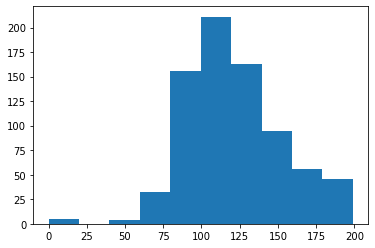

In [40]:
plt.hist(diabetes_data['Glucose'], bins=10) # 포도당 수치가 0인 것은 말이 안됨

In [42]:
# 피처에 0값의 건수가 몇 퍼센트인지 확인

# 0 값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI']

#전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수 출력 및 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] ==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))
                                                            

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [44]:
# 피처 값을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features) #0값을 평균값으로 대체

In [45]:
#피처 스케일링 적용
X = diabetes_data.iloc[:, :-1] #outcome을 제외한 데이터
Y = diabetes_data.iloc[:, -1]

#표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 156, stratify = Y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


In [51]:
#재현율이 너무 낮으므로 튜닝
#임계값에 따른 평가를 위한 함수 생성 및 수치 출력

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

thresholds = [0.3, 0.33, 0.35, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC:0.8433
임곗값: 0.35
오차 행렬
[[75 25]
 [15 39]]
정확도: 0.7403, 정밀도: 0.6094, 재현율: 0.7222, F1: 0.6610, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


In [52]:
# 임계값 0.48로 설정 후 다시 로지스텍 회귀 모델로 예측해 보면
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433
